## Midterm Project

# Analysis of Breweries


__Data Source__
         
   https://raw.githubusercontent.com/openbrewerydb/openbrewerydb/master/breweries.csv
   
   Data file size: 1.5 MB
 
This is the open-source dataset for the Open Brewery DB API which is served by a REST API built with Ruby on Rails. Retrieved from https://github.com/openbrewerydb/openbrewerydb

This dataset represents the data about breweries in the United states, Ireland and United Kingdom. It has 7984 rows and 16 columns. Some of the columns are brewery id, name, brewery type, street address, city, state, country, website URL. I am interested in this data because I like Exploring beers. It has a huge diversity of beer styles, taste profiles and in the future as a business opportunity I would like to invest in this industry.

__Introduction__

Beer is an alcoholic beverage produced by extracting raw materials with water, boiling with hops, and fermenting it. Beer brewing procedure has a cultural history behind it. In the 21st century the brewing industry has become large-scale with the use of technology. Brewery industry has grown so much that it has a significant contribution to the economic growth of the nation. America’s beer industry supports more than two million jobs, provides more than 102 billion dollor in wages and benefits, and contributes more than 331 billion dollor to the U.S. economy. These stats made me choose this dataset for the analysis. In this project I will try to get a generalized idea of how the brewery industry is distributed over the USA based on the given data.

There are distinct beer industry market segments.

- Large-  A brewery that produces Approximately 2 million barrels of beer per year.

- Regional-  A brewery with an annual beer production of between 15,000 and 2,000,000 barrels.

- Microbrewery- A brewery that produces less than 15,000 barrels of beer per year and sells 75 percent or more of its beer off-site.

- Brewpub-  A restaurant-brewer that sells 25 percent or more of its beer on-site and operates significant food services.

- Taproom-  A professional brewery that sells 25 percent or more of its beer on-site and does not operate significant food services.The beer is brewed primarily for sale in the taproom, and is often dispensed directly from the brewery’s storage tanks.

- Contract-  A business that hires another brewery to produce its beer.

- Proprietary-  A licensed tenant brewery that physically takes possession of a shared brewery while brewing.

- Nano-  A brewery which produces at least 1,000 barrels per year.(1/3 to 1/10th the size of a microbrewery)

__Objectives__

- To discover which type of brewery is popular
- To discover which location in the USA has potential for the brewery industry.
- To understand the overall industry insights.

In [1]:
import requests
from io import StringIO 
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Converting .csv file into pandas dataframe and adding index column.

brewery_df = pd.read_csv('https://raw.githubusercontent.com/openbrewerydb/openbrewerydb/master/breweries.csv',
                 index_col= 0).reset_index()

#### Understanding the dataset

In [3]:
# Checking the characteristics of the data.

brewery_df.head(5)

,obdb_id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,website_url,phone,country,longitude,latitude,tags
0,10-56-brewing-company-knox,10-56 Brewing Company,micro,400 Brown Cir,NaN,NaN,Knox,Indiana,NaN,46534,NaN,6308165790,United States,-86.627954,41.289715,NaN
1,10-barrel-brewing-co-bend-1,10 Barrel Brewing Co,large,62970 18th St,NaN,NaN,Bend,Oregon,NaN,97701-9847,http://www.10barrel.com,5415851007,United States,-121.281706,44.086835,NaN
2,10-barrel-brewing-co-bend-2,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,NaN,NaN,Bend,Oregon,NaN,97703-2465,NaN,5415851007,United States,-121.328802,44.057565,NaN
3,10-barrel-brewing-co-bend-pub-bend,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,NaN,NaN,Bend,Oregon,NaN,97701,NaN,5415851007,United States,-121.280954,44.091211,NaN
4,10-barrel-brewing-co-boise-boise,10 Barrel Brewing Co - Boise,large,826 W Bannock St,NaN,NaN,Boise,Idaho,NaN,83702-5857,http://www.10barrel.com,2083445870,United States,-116.202929,43.618516,NaN


In [4]:
# Number of rows and columns in dataframe.

brewery_df.shape

(8039, 16)

In [5]:
# Column names and their data types. 

brewery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8039 entries, 0 to 8038
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   obdb_id          8039 non-null   object 
 1   name             8039 non-null   object 
 2   brewery_type     8039 non-null   object 
 3   street           7240 non-null   object 
 4   address_2        67 non-null     object 
 5   address_3        23 non-null     object 
 6   city             8039 non-null   object 
 7   state            7897 non-null   object 
 8   county_province  143 non-null    object 
 9   postal_code      8039 non-null   object 
 10  website_url      6864 non-null   object 
 11  phone            7230 non-null   object 
 12  country          8039 non-null   object 
 13  longitude        5584 non-null   float64
 14  latitude         5584 non-null   float64
 15  tags             0 non-null      float64
dtypes: float64(3), object(13)
memory usage: 1005.0+ KB


The Dataset has 16 columns and 7984 rows in it. Each column has data types which are objects and floats. There are inconsistencies in the data which are mentioned below.

#### Inconsistency in data
- There are many columns( address_2, address_3,county_province,tags ) which don’t have significant entries in it. And   that information can also be retrieved from other columns(address can be located by postal_code).
- Missing values of latitude and longitude for 2829 number of records.
- Missing values for website_url for 1190 rows.
- Missing values of the state column for 142 entries.
- Missing values of the phone column for 810 entries.
- Data type of all the columns is the object.

#### Cleaning the data

To make the dataset more efficient for our analysis we need to perform some operations. In the following cells some of the data cleaning operations are done at this initial stage.

In [6]:
# Converting the data type base on the contents of the column.

brewery_df=brewery_df.convert_dtypes()
brewery_df.dtypes

obdb_id             string
name                string
brewery_type        string
street              string
address_2           string
address_3           string
city                string
state               string
county_province     string
postal_code         string
website_url         string
phone               string
country             string
longitude          float64
latitude           float64
tags                 Int64
dtype: object

In [7]:
# While trying to convert the data type of the phone column to integer got an error that it contains'3.53599E+11'
# which is not an int.
# replacing non int value with '0'.

brewery_df['phone'] = pd.to_numeric(brewery_df.phone.astype(str),errors='coerce').fillna(0).astype(int)
  
brewery_df.dtypes

obdb_id             string
name                string
brewery_type        string
street              string
address_2           string
address_3           string
city                string
state               string
county_province     string
postal_code         string
website_url         string
phone                int32
country             string
longitude          float64
latitude           float64
tags                 Int64
dtype: object

In [8]:
# Dropping address_2, address_3 and country_province because there are very few entries for them and 
# we have street and postal_code information to get the location.

brewery_df = brewery_df.drop(['address_2'], axis=1)
brewery_df = brewery_df.drop(['address_3'], axis=1)
brewery_df = brewery_df.drop(['county_province'], axis=1)

# Dropping tags Column as it is empty.

brewery_df = brewery_df.drop(['tags'], axis=1)

brewery_df.shape

(8039, 12)

In [9]:
#Selecting random columns for checking the consistency in the dataframe.

brewery_df.sample(5)

,obdb_id,name,brewery_type,street,city,state,postal_code,website_url,phone,country,longitude,latitude
3970,kassiks-brewery-kenai,Kassik's Brewery,micro,47160 Spruce Haven St,Kenai,Alaska,99611-9677,<NA>,0,United States,-151.307721,60.663773
7548,unruly-brewing-company-muskegon,Unruly Brewing Company,micro,360 W Western Ave,Muskegon,Michigan,49440-1273,http://www.unrulybrewing.com,-2147483648,United States,-86.253815,43.235044
2972,garvies-point-brewery-glen-cove,Garvies Point Brewery,micro,1 Garvies Point Rd,Glen Cove,New York,11542-2821,http://www.garviespointbrewery.com,-2147483648,United States,-73.644083,40.858979
4291,little-city-brewing-co-raleigh,Little City Brewing Co.,micro,400 W North St Ste 120,Raleigh,North Carolina,27603-1570,http://Www.thelocalicon.com/little-city,-2147483648,United States,NaN,NaN
2414,eclipse-brewing-merchantville,Eclipse Brewing,micro,25 E Park Ave,Merchantville,New Jersey,08109-2607,<NA>,-2147483648,United States,-75.048313,39.951644


__Note :__ Since data which is missing in the columns are closely related to brewery ID and they all are unique(like phone number , lat lon values). So filling the values for missing data is not suitable for this data set. It will be more effective to proceed as it is.

In [10]:
# Checking the types of breweries.

brewery_df['brewery_type'].unique()

<StringArray>
[     'micro',      'large',    'brewpub',     'closed', 'proprietor',
   'contract',   'regional',   'planning',       'nano',    'taproom',
        'bar']
Length: 11, dtype: string

__Note :__  Breweries are the places where beer is produced and sold on-site or off-site.There is no production of beer in the bar. Bar is the place where different types of alcohol are served. So there are 2 entries in the dataset as type bar which are outliers which need to be removed from the dataset.

In [11]:
# Dropping columns where brewery_type is bar.

brewery_df.drop(brewery_df[brewery_df['brewery_type']== 'bar'].index, inplace = True)
brewery_df['brewery_type'].value_counts()

micro         4188
brewpub       2395
planning       721
regional       224
contract       198
closed         148
large           78
proprietor      69
taproom         11
nano             5
Name: brewery_type, dtype: Int64

In [12]:
brewery_df.shape

(8037, 12)

__Note :__ Original size of the dataset was (7984, 16). After dropping the rows and columns it is (7982,12).

In [13]:
# Converting the data type of brewery_type column into category.

brewery_df['brewery_type'] = brewery_df['brewery_type'].astype('category')
brewery_df.dtypes

obdb_id           string
name              string
brewery_type    category
street            string
city              string
state             string
postal_code       string
website_url       string
phone              int32
country           string
longitude        float64
latitude         float64
dtype: object

In [14]:
# Checking the number of countries.

brewery_df['country'].value_counts()

United States    7892
Ireland            70
England            62
Scotland           10
France              3
Name: country, dtype: Int64

#### Sanity check on categorical data

- Checking for the outliers.
- Checking the distribution of data (frequent values in the column).
- Checking why the values are repeated to verify if there are duplicate entries.

In [15]:
# Checking the overall distribution of the data in columns with dtype string.

brewery_df.describe(include='string')

,obdb_id,name,street,city,state,postal_code,website_url,country
count,8037,8037,7238,8037,7895,8037,6862,8037
unique,8037,7892,7144,2975,54,7799,6513,5
top,cellar-west-artisan-ales-boulder,Granite City Food & Brewery,303 Main St,Portland,California,97701,http://www.gcfb.net,United States
freq,1,6,3,105,912,5,23,7892


__Note :__ obdb_id has no repeating values in the column. That means each entry can uniquely identify the row.

In [16]:
# Most repeated brewery name.

brewery_df[brewery_df['name'] == 'Ballast Point Brewing Company'].dropna(how='all')


,obdb_id,name,brewery_type,street,city,state,postal_code,website_url,phone,country,longitude,latitude
561,ballast-point-brewing-company-anaheim,Ballast Point Brewing Company,planning,<NA>,Anaheim,California,92802-2294,<NA>,0,United States,-117.911732,33.834752
562,ballast-point-brewing-company-chicago,Ballast Point Brewing Company,planning,<NA>,Chicago,Illinois,60607,<NA>,0,United States,NaN,NaN
563,ballast-point-brewing-company-daleville,Ballast Point Brewing Company,large,555 International Pkwy,Daleville,Virginia,24083-3028,<NA>,-2147483648,United States,-79.913803,37.435756
565,ballast-point-brewing-company-long-beach,Ballast Point Brewing Company,large,110 N Marina Dr,Long Beach,California,90803-4601,http://www.ballastpoint.com,-2147483648,United States,-118.114751,33.746418
566,ballast-point-brewing-company-san-diego-1,Ballast Point Brewing Company,large,9045 Carroll Way,San Diego,California,92121-2405,http://www.ballastpoint.com,-2147483648,United States,-117.158725,32.887981
567,ballast-point-brewing-company-san-diego-2,Ballast Point Brewing Company,large,7606 Trade St,San Diego,California,92121-2405,<NA>,-2147483648,United States,-117.157081,32.889641


In [17]:
# Most repeated streets in dataset.

brewery_df[brewery_df['street'] == '303 Main St'].dropna(how='all')

,obdb_id,name,brewery_type,street,city,state,postal_code,website_url,phone,country,longitude,latitude
5331,oskar-blues-brewery-lyons-lyons,Oskar Blues Brewery - Lyons,brewpub,303 Main St,Lyons,Colorado,80540,http://www.oskarblues.com,-2147483648,United States,-105.267693,40.224513
5736,racine-brewing-co-racine,Racine Brewing Co,micro,303 Main St,Racine,Wisconsin,53403,http://www.racinebrewingcompany.com,-2147483648,United States,-87.783393,42.730507
6777,stormcloud-brewing-company-frankfort,Stormcloud Brewing Company,brewpub,303 Main St,Frankfort,Michigan,49635-9047,http://www.stormcloudbrewing.com,-2147483648,United States,-86.241002,44.632906


__Note :__ Most frequent street in the dataset is 303 Main St. Which might mislead us thinking that 303 Main St is known as a brewery area. But when we look at all other information all three breweries are located in different states which have 303 Main street.

To find in which area breweries are most clustered we need to look at frequent postal codes.

In [18]:
# Most repeated posta_code in the dataset.

brewery_df[brewery_df['postal_code'] == '97701'].dropna(how='all')

,obdb_id,name,brewery_type,street,city,state,postal_code,website_url,phone,country,longitude,latitude
3,10-barrel-brewing-co-bend-pub-bend,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,Bend,Oregon,97701,<NA>,-2147483648,United States,-121.280954,44.091211
787,bend-brewing-high-desert-bend,Bend Brewing High Desert,closed,20650 NE High Desert Lane,Bend,Oregon,97701,<NA>,-2147483648,United States,-121.291484,44.087276
1131,boneyard-beer-co-bend-2,Boneyard Beer Co,brewpub,1955 NE Division St,Bend,Oregon,97701,http://www.boneyardbeer.com,-2147483648,United States,-121.306535,44.070947
3078,goodlife-brewing-company-bend,GoodLife Brewing Company,regional,70 SW Century Ave 100-464,Bend,Oregon,97701,http://www.goodlifebrewing.com,-2147483648,United States,-121.330294,44.051383
4811,monkless-belgian-ales-bend,Monkless Belgian Ales,micro,20750 High Desert Ln Suite 107,Bend,Oregon,97701,http://www.monkless.com,-2147483648,United States,-121.317916,44.050206


In [19]:
# Most repeated city.

brewery_df['city'].value_counts().head(5)

Portland     105
San Diego     91
Denver        91
Seattle       78
Chicago       64
Name: city, dtype: Int64

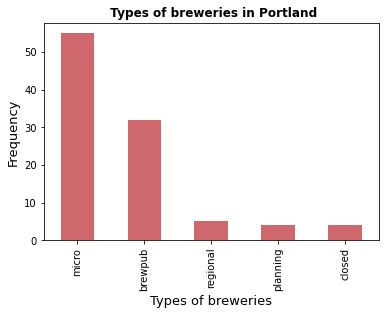

In [20]:
# Creating new dataframe where city name is Portland.

df_portland = brewery_df[brewery_df['city'] == 'Portland'].dropna(how='all')

#Ploting the graph of top 5 brewery types in Portland.

df_portland['brewery_type'].value_counts()[:5].plot(kind='bar',color='#CF686D')
plt.title(" Types of breweries in Portland",fontweight="bold")
plt.xlabel('Types of breweries',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

__Observation__: Portland has a higher number of micro and brewpub types of breweries than other brewery types.

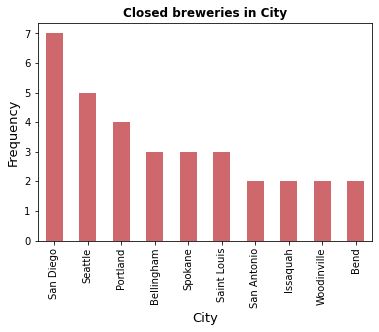

In [21]:
# Creating new dataframe where brewery type is closed.

df_type_closed= brewery_df[brewery_df['brewery_type'] == 'closed'].dropna(how='all')

#Ploting the graph of cities which have the most number of closed breweries.

df_type_closed['city'].value_counts()[:10].plot(kind='bar',color='#CF686D')
plt.title("Closed breweries in City",fontweight="bold")
plt.xlabel('City',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

__Observation :__ There are not a significant number of breweries which are closed in particular cities or states.

C:\Users\}{\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


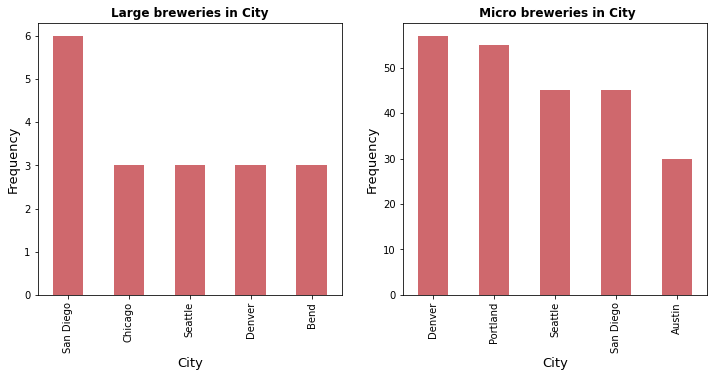

In [22]:
# Creating new dataframe where brewery type is large.

df_type_large= brewery_df[brewery_df['brewery_type'] == 'large'].dropna(how='all')

# Creating new dataframe where brewery type is micro.

df_type_micro = brewery_df[brewery_df['brewery_type'] == 'micro'].dropna(how='all')

#Ploting the graph of cities which have large breweries.

fig= plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df_type_large['city'].value_counts()[:5].plot(kind='bar',color='#CF686D')
plt.title("Large breweries in City",fontweight="bold")
plt.xlabel('City',fontsize=13)
plt.ylabel('Frequency',fontsize=13)


#Ploting the graph of cities which have micro breweries.

plt.subplot(1,2,2)
df_type_micro['city'].value_counts()[:5].plot(kind='bar',color='#CF686D')
plt.title(" Micro breweries in City",fontweight="bold")
plt.xlabel('City',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

plt.show()

__Observation :__ San Diego has 7 large breweries. We can not see Portland in the top 10 cities even though it has the highest number of breweries. Because Portland is famous for micro breweries.

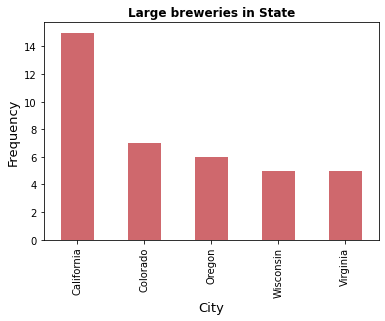

In [23]:
#Ploting the graph of top 5 states which have large breweries.

df_type_large['state'].value_counts()[:5].plot(kind='bar',color='#CF686D')

plt.title("Large breweries in State",fontweight="bold")
plt.xlabel('City',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

__Observation :__ Along with West coast states Wisconsin and Virginia also has a significant number of large breweries.

In [24]:
# Creating new dataframe with breweries in Ireland and UK.

 
df_Ire_UK= brewery_df.loc[(brewery_df['country'] == 'Ireland') | 
                         (brewery_df['country'] == 'England') | 
                         (brewery_df['country'] == 'Scotland')]
df_Ire_UK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 16 to 7996
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   obdb_id       142 non-null    string  
 1   name          142 non-null    string  
 2   brewery_type  142 non-null    category
 3   street        142 non-null    string  
 4   city          142 non-null    string  
 5   state         0 non-null      string  
 6   postal_code   142 non-null    string  
 7   website_url   133 non-null    string  
 8   phone         142 non-null    int32   
 9   country       142 non-null    string  
 10  longitude     141 non-null    float64 
 11  latitude      141 non-null    float64 
dtypes: category(1), float64(2), int32(1), string(8)
memory usage: 13.3 KB


__Note :__ All the results above have US data. Because the number of entries of US data is very large as compared to other countries. Created a new data frame to see if we can find some interesting trends for Ireland, England and Scotland breweries.

In [25]:
# Number of breweries in each country.

df_Ire_UK['country'].value_counts()

Ireland     70
England     62
Scotland    10
Name: country, dtype: Int64

In [26]:
# df_Ire_UK.describe(include='all')

__Observation :__ In this dataframe also there are similar trends like these countries also have mostly micro type of breweries. Dublin is the city with the highest number of breweries there.

In [27]:
# !pip install chart_studio

In [28]:
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Creating the new dataframe with breweries only in the US. 

df_US = brewery_df[brewery_df['country'] == 'United States']
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7892 entries, 0 to 8038
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   obdb_id       7892 non-null   string  
 1   name          7892 non-null   string  
 2   brewery_type  7892 non-null   category
 3   street        7093 non-null   string  
 4   city          7892 non-null   string  
 5   state         7892 non-null   string  
 6   postal_code   7892 non-null   string  
 7   website_url   6726 non-null   string  
 8   phone         7892 non-null   int32   
 9   country       7892 non-null   string  
 10  longitude     5438 non-null   float64 
 11  latitude      5438 non-null   float64 
dtypes: category(1), float64(2), int32(1), string(8)
memory usage: 717.1 KB


In [29]:
#Creating new column as brewery_count which will calculate and store the breweries in every state.

df_US['brewery_count'] = df_US['obdb_id'].groupby(df_US['state']).transform('count')
df_US.head(2)


,obdb_id,name,brewery_type,street,city,state,postal_code,website_url,phone,country,longitude,latitude,brewery_count
0,10-56-brewing-company-knox,10-56 Brewing Company,micro,400 Brown Cir,Knox,Indiana,46534,<NA>,-2147483648,United States,-86.627954,41.289715,162
1,10-barrel-brewing-co-bend-1,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,http://www.10barrel.com,-2147483648,United States,-121.281706,44.086835,295


In [30]:
# Extract the entries which have latitude and longitude. 

df_latlon=df_US[df_US.longitude.notnull()]

In [31]:
# Creating a new column which will store the information displayed
# while hovering on the interactive graph. 

df_latlon['text_template'] = df_latlon[['name', 'city','state']].agg(','.join, axis=1)
df_latlon.head(2)

,obdb_id,name,brewery_type,street,city,state,postal_code,website_url,phone,country,longitude,latitude,brewery_count,text_template
0,10-56-brewing-company-knox,10-56 Brewing Company,micro,400 Brown Cir,Knox,Indiana,46534,<NA>,-2147483648,United States,-86.627954,41.289715,162,"10-56 Brewing Company,Knox,Indiana"
1,10-barrel-brewing-co-bend-1,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,http://www.10barrel.com,-2147483648,United States,-121.281706,44.086835,295,"10 Barrel Brewing Co,Bend,Oregon"


In [32]:
# Plotting the interactive map which will show the location of breweries in the US.

data = go.Scattergeo(
        lon = df_latlon['longitude'],
        lat = df_latlon['latitude'],
        text = df_latlon['text_template'],
        hoverinfo="text",
        mode = 'markers',
        marker = dict(symbol = 'star',size=4,colorscale = 'matter',colorbar = {'title':"No of Breweries per State"} ),
        marker_color = df_latlon['brewery_count'],
        )
layout = dict(title = 'Breweries locations USA',
              geo_scope = 'usa'
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

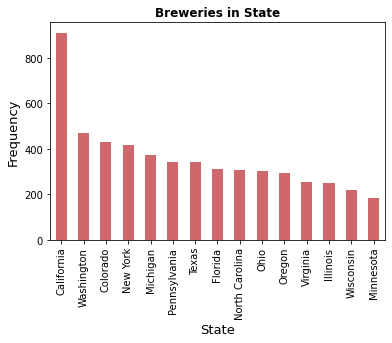

In [33]:
# Since the lat, lon values are missing for almost 2000 breweries 
# will try plotting graph with states for cross verification.

df_US['state'].value_counts()[:15].plot(kind='bar',color='#CF686D')

plt.title("Breweries in State",fontweight="bold")
plt.xlabel('State',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()



__Observation :__ Even when we plot graph with all the breweries state wise. It is showing a similar result as in lat lon map. 

### What we learned ?

1] Ballast Point Brewing Company has the highest number of franchisees in craft breweries. Mostly they are in California.

2] In Bend, Oregon there is a hub of breweries. There are large and regional breweries located in the postal code – 97701 area.

3] Portland, Denver, San Diego, Seattle and Chicago are the top five cities which have the highest number of breweries.

4] Portland has the greatest number of micro and brewpub types of breweries. Further analysis found, since the 80s, Portland is pioneering the craft beer movement with fresh ingredients like Willamette Valley hops and Bull Run water. City has a nickname “Beervana” due to its vast range of beer industry.

5] There is a correlation between the number of breweries and states. We can see that mostly breweries are popular in states California, Washington, Colorado, New York and Michigan.

6] Profitable locations of breweries defer based on which type of beer you want to make. Micro-breweries mostly make craft beers which they sell on-site also, whereas large breweries rarely sell cell beers on-site. San Diego is good for large breweries and Portland is a good choice for micro-breweries.